 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_df = pd.read_csv ('whale_returns.csv',index_col = 'Date', infer_datetime_format = True, parse_dates = True)

In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace = True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_df = pd.read_csv ('algo_returns.csv', index_col = 'Date', infer_datetime_format = True, parse_dates = True)
#algo_df = pd.read_csv('algo_returns.csv')

In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv ('sp500_history.csv', index_col = 'Date', infer_datetime_format = True, parse_dates = True )

In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# Convert Date column to date time
#sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])

# Remove $ from Close column and covert to float
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').astype(float)

/Users/taramcdaniel/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [11]:
# Sort values Date column in ascending order
sp500_df.sort_values(by=['Date'],inplace=True)
sp500_df.copy
sp500_df


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [12]:
# Calculate Daily Returns
#close_px = sp500_df['Close']
#sp500_daily_return = close_px / close_px.shift(1) - 1
sp500_df['Daily Return'] = sp500_df['Close'].pct_change()

In [13]:
# Drop nulls
sp500_df.dropna(inplace = True)
sp500_df.drop(columns=['Close'], inplace = True)
sp500_df

,Daily Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Rename `Close` Column to be specific to this portfolio.
#sp500update_df = sp500_daily_return.rename(columns={'Close': 'Daily Return'})
#sp500update_df
sp500_update_df = sp500_df.rename(columns={'Daily Return': 'S&P 500'})
sp500_update_df

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [15]:
# Clean Algo Return Data

In [16]:
# Read Algo returns
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [17]:
# Convert Date column to date time Algo returns
#algo_df.set_index(pd.to_datetime(algo_df['Date'],infer_datetime_format=True ,inplace=True) 
#algo_df.drop(columns=['Date'],inplace=True)
#algo_df['Date'] = pd.to_datetime(algo_df['Date'])
#algo_df

In [18]:
# Sort the values of algo_df by 'Date' column in ascending order
algo_df.sort_values(by=['Date'],inplace=True)
algo_df.copy
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [19]:
# Set the range of Dates to 2015-03-02 through 2019-04-23
algo_df_lkup = (algo_df.index >'2015-03-02') & (algo_df.index <= '2019-04-23')
algo_df = algo_df.loc[algo_df_lkup]
#algo_df

#algo_df.date_range(start='2015-03-02', end='2019-04-23')

## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_update_df], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

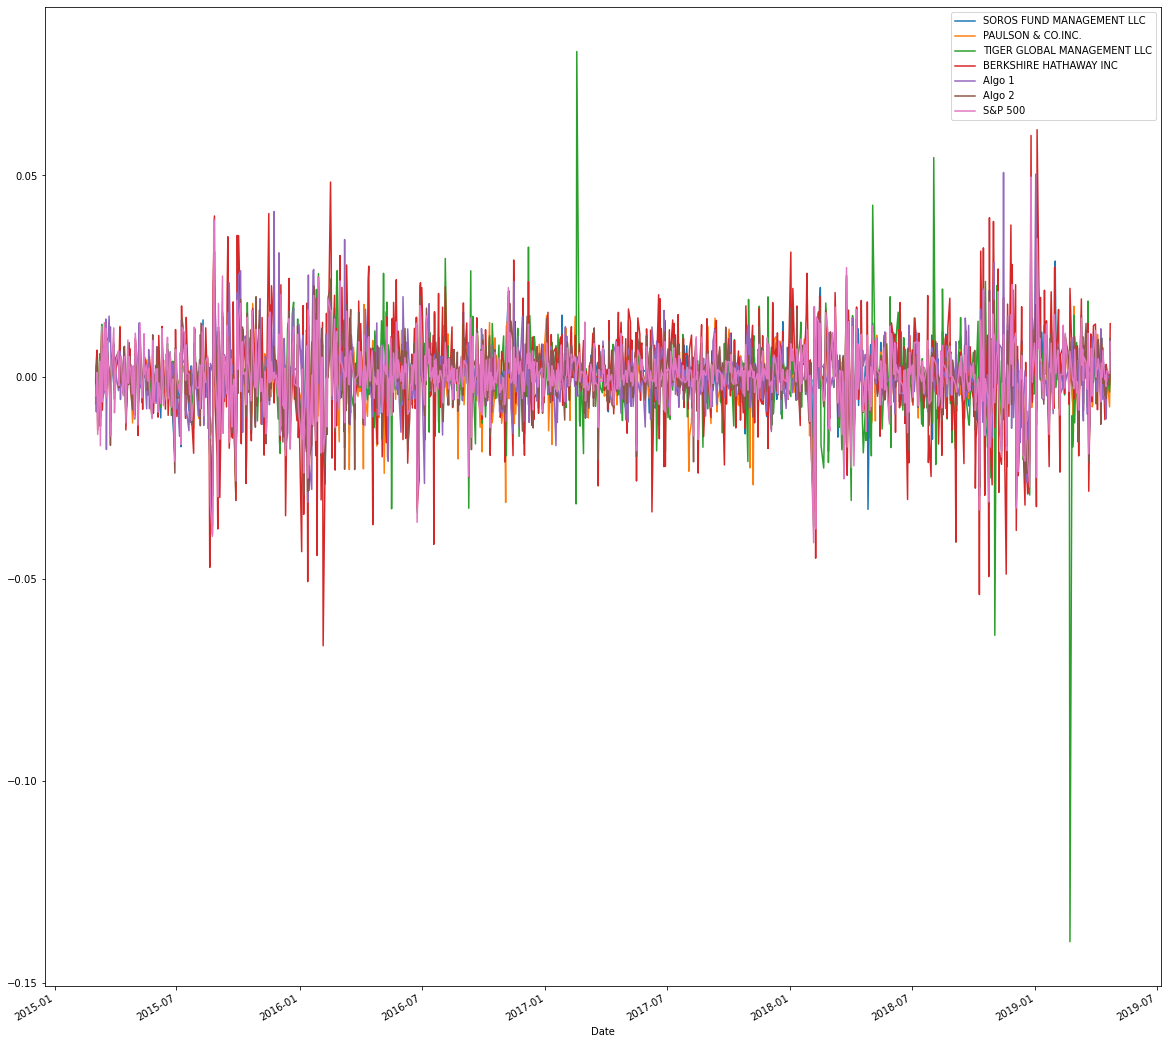

In [21]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20,20), legend = True);

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

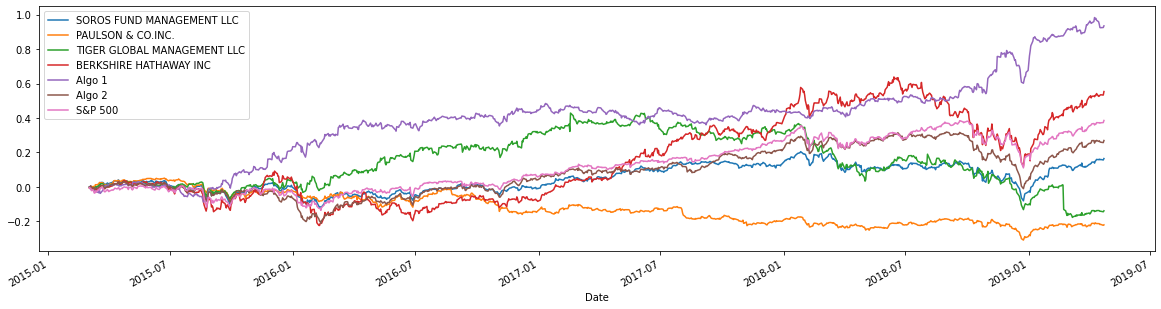

In [22]:


# Calculate cumulative returns of all portfolios
combined_df = np.cumprod(1+combined_df) -1
# Plot cumulative returns
combined_df.plot(figsize = (20,5), legend = True)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

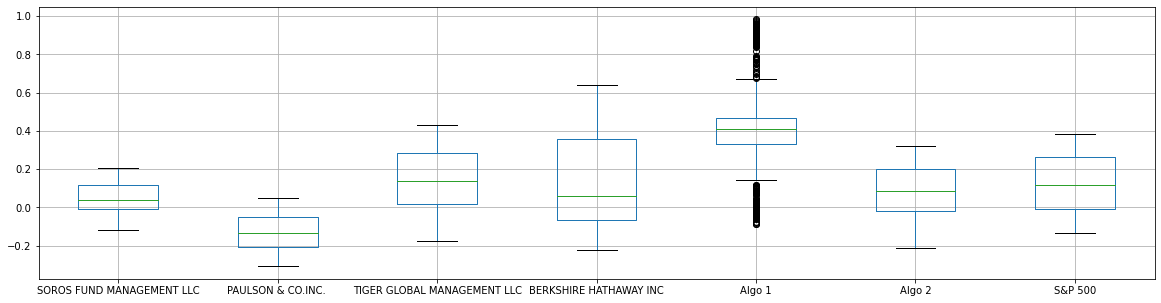

In [23]:
# Box plot to visually show risk
combined_df.boxplot(column  = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','S&P 500'],figsize =(20,5))

### Calculate Standard Deviations

In [24]:
combined_std_df = pd.DataFrame()

In [25]:
# Calculate the daily standard deviations of all portfolios
combined_std_df = combined_df.std()
combined_std_df.sort_values(inplace=True)
combined_std_df

SOROS FUND MANAGEMENT LLC      0.073238
PAULSON & CO.INC.              0.088455
Algo 2                         0.131700
S&P 500                        0.144448
TIGER GLOBAL MANAGEMENT LLC    0.149844
Algo 1                         0.232277
BERKSHIRE HATHAWAY INC         0.241575
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [26]:
# Calculate  the daily standard deviation of S&P 500
sp500std = combined_std_df['S&P 500']
sp500std


0.14444769967610394

In [27]:
# Determine which portfolios are riskier than the S&P 500
combined_std_df  > 0.14444769967610394

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
Algo 1                          True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
combined_annual = combined_std_df *np.sqrt(252)
combined_annual

SOROS FUND MANAGEMENT LLC      1.162620
PAULSON & CO.INC.              1.404180
Algo 2                         2.090678
S&P 500                        2.293036
TIGER GLOBAL MANAGEMENT LLC    2.378706
Algo 1                         3.687285
BERKSHIRE HATHAWAY INC         3.834878
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

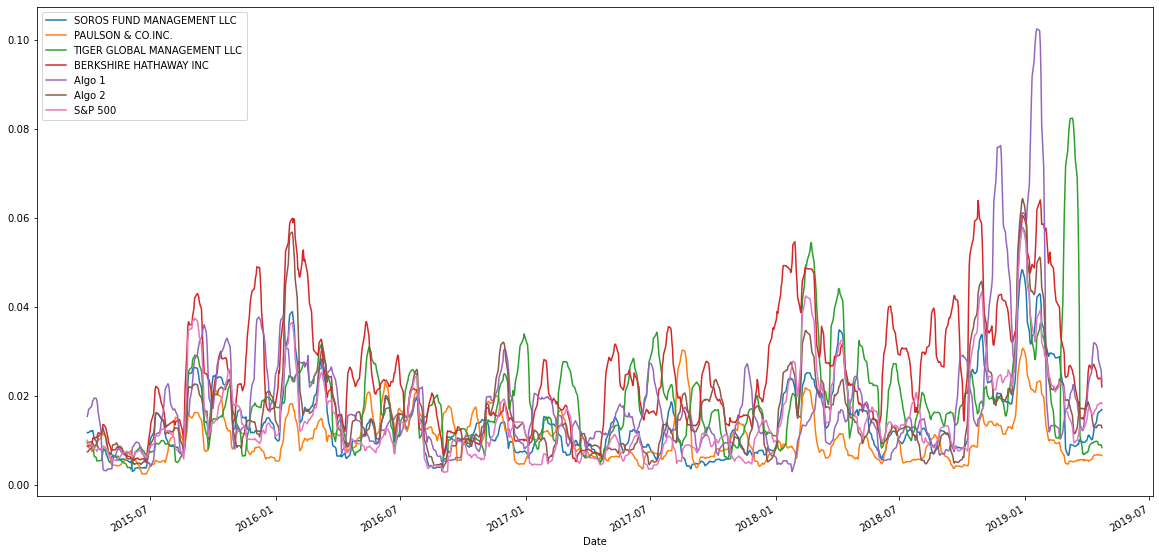

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_all_port  = combined_df.rolling(window = 21).std()
# Plot the rolling standard deviation
rolling_all_port.plot(figsize = (20,10), legend = True);

### Calculate and plot the correlation

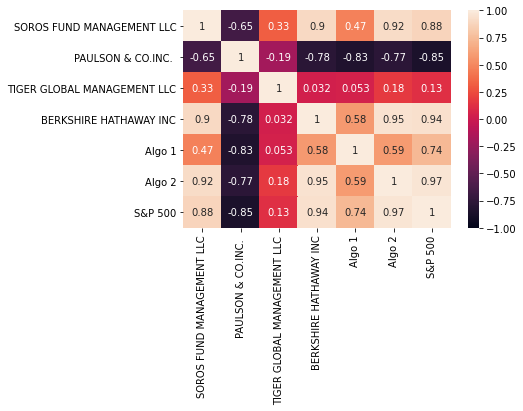

In [30]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin = -1 ,vmax = 1,annot = True);

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

SOROS FUND MANAGEMENT LLC: 0.009262121816539777



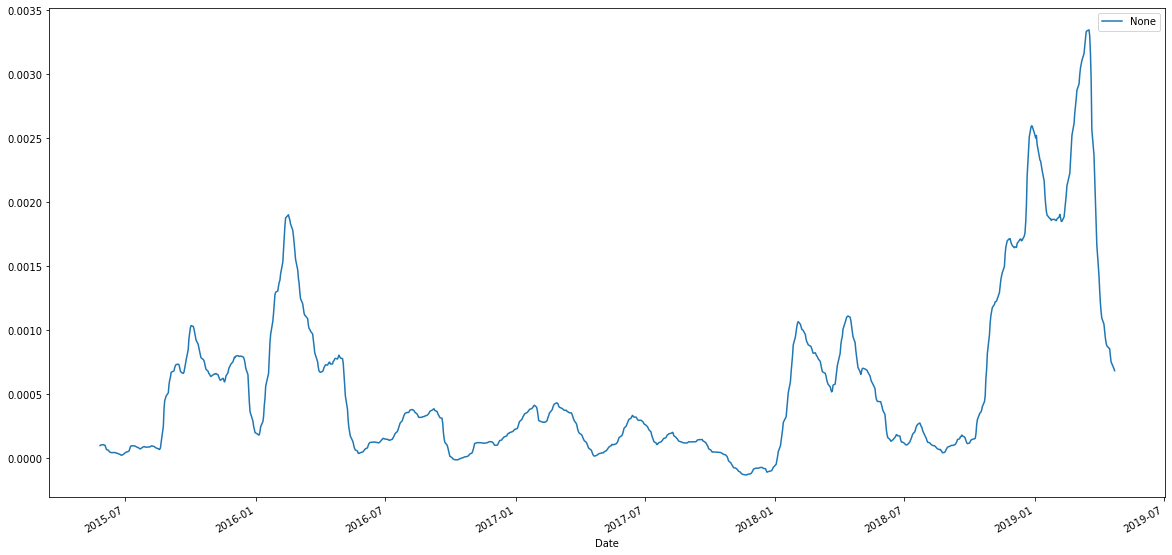

In [31]:
# Calculate covariance of a single portfolio
sfmcovariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P 500'])
print(f'SOROS FUND MANAGEMENT LLC: {sfmcovariance}\n')
rolling_sfm_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_sfm_covariance.plot(figsize = (20,10), legend = True);


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [32]:
# Use `ewm` to calculate the rolling window
ewm_sfm = combined_df['SOROS FUND MANAGEMENT LLC'].ewm(span=21, adjust=False).mean()
ewm_pco_inc = combined_df['PAULSON & CO.INC. '].ewm(span=21, adjust=False).mean()
ewm_tgm = combined_df['TIGER GLOBAL MANAGEMENT LLC'].ewm(span=21, adjust=False).mean()
ewm_bhi = combined_df['BERKSHIRE HATHAWAY INC'].ewm(span=21, adjust=False).mean()
ewm_algo1 = combined_df['Algo 1'].ewm(span=21, adjust=False).mean()
ewm_algo2 = combined_df['Algo 2'].ewm(span=21, adjust=False).mean()


print(f'SOROS FUND MANAGEMENT LLC: {ewm_sfm}\n')
print(f'PAULSON & CO.INC.: {ewm_pco_inc}\n')
print(f'TIGER GLOBAL MANAGEMENT LLC: {ewm_tgm}\n')
print(f'BERKSHIRE HATHAWAY INC: {ewm_bhi}\n')
print(f'Algo 1: {ewm_algo1}\n')
print(f'Algo 2: {ewm_algo2}\n')


SOROS FUND MANAGEMENT LLC: Date
2015-03-03   -0.001266
2015-03-04   -0.001063
2015-03-05   -0.000514
2015-03-06   -0.000736
2015-03-09   -0.000886
                ...   
2019-04-16    0.138086
2019-04-17    0.139860
2019-04-18    0.141625
2019-04-22    0.142957
2019-04-23    0.144922
Name: SOROS FUND MANAGEMENT LLC, Length: 1043, dtype: float64

PAULSON & CO.INC.: Date
2015-03-03   -0.004981
2015-03-04   -0.004687
2015-03-05   -0.004051
2015-03-06   -0.003798
2015-03-09   -0.003184
                ...   
2019-04-16   -0.217090
2019-04-17   -0.217198
2019-04-18   -0.217209
2019-04-22   -0.217741
2019-04-23   -0.217979
Name: PAULSON & CO.INC. , Length: 1043, dtype: float64

TIGER GLOBAL MANAGEMENT LLC: Date
2015-03-03   -0.000496
2015-03-04   -0.000726
2015-03-05   -0.000722
2015-03-06   -0.001488
2015-03-09   -0.001659
                ...   
2019-04-16   -0.143357
2019-04-17   -0.143209
2019-04-18   -0.143028
2019-04-22   -0.143148
2019-04-23   -0.142754
Name: TIGER GLOBAL MANAGEMENT LL

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
sharpe_ratio =  (combined_df.mean() * 252) /(combined_std_df *np.sqrt(252))
sharpe_ratio

Algo 1                         26.584386
Algo 2                         10.480419
BERKSHIRE HATHAWAY INC         10.488981
PAULSON & CO.INC.             -22.246513
S&P 500                        13.578149
SOROS FUND MANAGEMENT LLC      10.800652
TIGER GLOBAL MANAGEMENT LLC    15.675541
dtype: float64

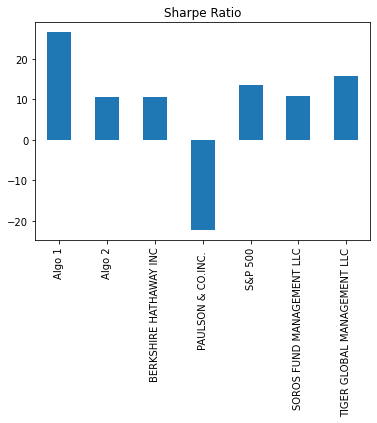

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title='Sharpe Ratio');

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [35]:
# Reading data from 1st stock

goog_price = pd.read_csv('goog_historical.csv', index_col = 'Trade DATE', infer_datetime_format = True,parse_dates = True)
goog_price.rename(columns = {'NOCP':'GOOG'},inplace =True)
google=goog_price.drop(columns=['Symbol'])
google.head(5)

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [36]:
# Reading data from 2nd stock

aapl_price = pd.read_csv('aapl_historical.csv', index_col = 'Trade DATE', infer_datetime_format = True,parse_dates = True)
aapl_price.rename(columns = {'NOCP':'AAPL'},inplace =True)
apple=aapl_price.drop(columns=['Symbol'])
apple.head(5)

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [37]:
# Reading data from 3rd stock

cost_price = pd.read_csv('cost_historical.csv', index_col = 'Trade DATE', infer_datetime_format = True,parse_dates = True)
cost_price.rename(columns = {'NOCP':'COST'},inplace =True)
costco=cost_price.drop(columns=['Symbol'])
costco.head(5)

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [38]:
# Combine all stocks in a single DataFrame
combined_stock_prices = pd.concat([google,apple,costco], axis = 1, join =  'inner' )
combined_stock_prices.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [39]:
# Reset Date index
#combined_stock_prices.reset_index(drop=True, inplace=True)
#combined_stock_prices

combine_df = combined_stock_prices.reset_index(drop=True)
combine_df

,GOOG,AAPL,COST
0,1162.38,200.72,243.47
1,1166.27,202.90,241.34
2,1174.10,202.86,240.18
3,1189.39,208.48,244.23
4,1185.40,211.75,244.62
...,...,...,...
245,1078.59,186.99,199.60
246,1081.77,188.18,198.71
247,1079.23,186.44,195.48
248,1100.20,188.15,195.88


In [40]:
# Reorganize portfolio data by having a column per symbol
#Completed previously

In [41]:
# Calculate daily returns
daily_returns = combined_stock_prices.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns = portfolio_returns.to_frame()
portfolio_returns = portfolio_returns.rename(columns = {0: 'Weighted Returns'})
portfolio_returns.head(5)

,Weighted Returns
Trade DATE,
2019-05-08,0.001820
2019-05-07,0.000570
2019-05-06,0.019196
2019-05-03,0.004642
2019-05-02,-0.013131


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Join your returns DataFrame to the original returns DataFrame
returns_df = pd.concat([combined_df,portfolio_returns], axis=1)
returns_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Weighted Returns
2018-05-11,0.108502,-0.237338,0.108748,0.540246,0.510408,0.267421,0.288246,-0.000012
2018-05-14,0.108502,-0.237338,0.108748,0.540246,0.511789,0.269493,0.289385,0.010216
2018-05-15,0.107698,-0.238412,0.105212,0.517749,0.510074,0.268047,0.280562,-0.009283
2018-05-16,0.117265,-0.233656,0.111268,0.524291,0.506561,0.272283,0.285762,0.001618
2018-05-17,0.115080,-0.231722,0.104303,0.516456,0.496091,0.278905,0.284662,0.006112
...,...,...,...,...,...,...,...,...
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,0.372945,-0.009149
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,0.369823,-0.001541
2019-04-18,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,0.371986,-0.001148
2019-04-22,0.156280,-0.223061,-0.144348,0.533046,0.925124,0.257151,0.373375,-0.011812


In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC       11
PAULSON & CO.INC.               11
TIGER GLOBAL MANAGEMENT LLC     11
BERKSHIRE HATHAWAY INC          11
Algo 1                          11
Algo 2                          11
S&P 500                         11
Weighted Returns               805
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized `std`
portfolio_std = returns_df.std() *np.sqrt(252)
portfolio_std

SOROS FUND MANAGEMENT LLC      1.162620
PAULSON & CO.INC.              1.404180
TIGER GLOBAL MANAGEMENT LLC    2.378706
BERKSHIRE HATHAWAY INC         3.834878
Algo 1                         3.687285
Algo 2                         2.090678
S&P 500                        2.293036
Weighted Returns               0.212131
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

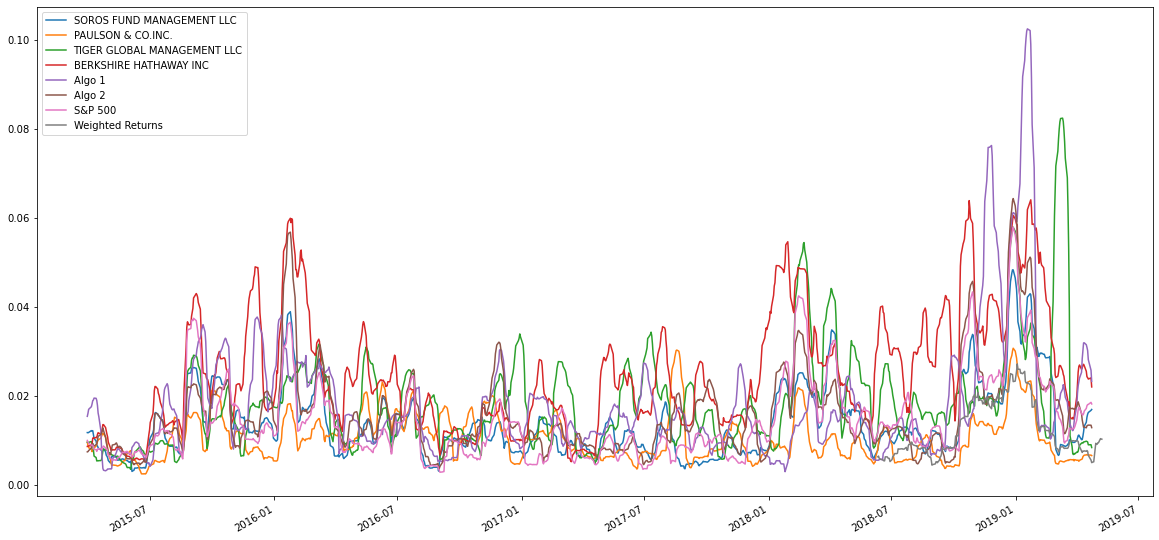

In [52]:
# Calculate rolling standard deviation
rolling_21  = returns_df.rolling(window = 21).std()
# Plot rolling standard deviation
rolling_21.plot(figsize = (20,10), legend = True)

### Calculate and plot the correlation

<AxesSubplot:>

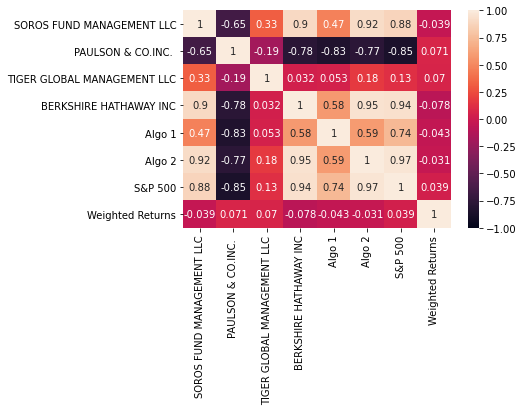

In [54]:
# Calculate and plot the correlation
correlation = returns_df.corr()
sns.heatmap(correlation, vmin = -1 ,vmax = 1,annot = True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [59]:
# Calculate and plot Beta
returns_beta = returns_df.cov#(combined_df['S&P 500'])

# rolling_60 = returns_beta.rolling(window=60).covcov(combined_df['S&P 500'])
# rolling_60.plot(figsize = (20,10), legend = True);

returns_beta

<bound method DataFrame.cov of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.000962           -0.001755   
2015-03-05                   0.004981            0.002314   
2015-03-06                  -0.002963           -0.001269   
2015-03-09                  -0.002383            0.002951   
...                               ...                 ...   
2019-05-02                        NaN                 NaN   
2019-05-03                        NaN                 NaN   
2019-05-06                        NaN                 NaN   
2019-05-07                        NaN                 NaN   
2019-05-08                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.003028               -0.002383 -0.010514   
2015-

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [60]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio2 =  (returns_df.mean() * 252) /(portfolio_std *np.sqrt(252))
sharpe_ratio2

SOROS FUND MANAGEMENT LLC      0.680377
PAULSON & CO.INC.             -1.401399
TIGER GLOBAL MANAGEMENT LLC    0.987466
BERKSHIRE HATHAWAY INC         0.660744
Algo 1                         1.674659
Algo 2                         0.660204
S&P 500                        0.855343
Weighted Returns              -0.023695
dtype: float64

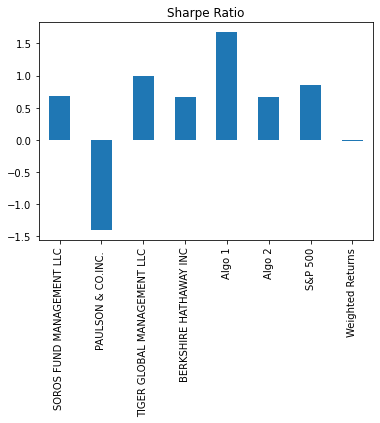

In [61]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio2.plot.bar(title='Sharpe Ratio');

### How does your portfolio do?

Write your answer here!